# **Analyse de la Ligue 1**

## Extraction des données

### Importation des Packages

In [ ]:
import time
import requests
import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Extraction data

In [ ]:
page_web = 'https://www.bdfutbol.com/es/t/'
ligue = 't.html#fra'


#Récupérer le code html en tant que chaîne de caractère
response = requests.get(page_web + ligue)
html = response.text

#On va utiliser la libraire BeautifulSoup pour extraire l'information html
soup = bs4.BeautifulSoup(html, "html.parser")
df_scores = pd.DataFrame()



In [ ]:
#Bouclons sur toutes les années disponibles de la Ligue1
#On se place dans le cadre de la France
name_list = soup.find_all(class_='bloc_temporades')
name_list_item = []
for i in name_list:
    name_list_item.append(i)


for anchor in name_list_item[6].find_all('a'):
    #Obtenir le lien hypertexte de chaque année
    page = anchor.get('href')
    saison = anchor.text

    #Extraire le code html comme chaîne de caractère
    response = requests.get(page_web + page)
    html = response.text

    #Création d'un objet Bfsouo
    soup = bs4.BeautifulSoup(html, "html.parser")

    #Obtenir les tableaux ds championnats
    table = soup.find(class_ ="taula_estil sortable")
    df_ligue = pd.read_html(str(table))[0]

    df_ligue['saison'] = saison
    df_scores = df_scores.append(df_ligue)

    time.sleep(0.2) # Pour laisser le temps a a page de se recharger
df_scores.head()

# ***Data CLeaning***

In [ ]:
#On supprime tout d'abord les colonnes inutiles  et on check les modifications
df_scores.drop(columns=["Unnamed: 1"], inplace=True)
df_scores.columns

In [ ]:
#On va renommer les colonnes pour une meiller compréhension :)
df_scores.rename({'Unnamed: 0': 'Classement',
                  'Unnamed: 2': 'Club',
                  'Puntos': 'Points',
                  'PJ': 'Match_joue',
                  'PG': 'Victoire',
                  'PE': 'Match_nul',
                  'PP': 'Defaite',
                  'GF': 'But_marque',
                  'GC': 'But_encaisse',
                  'TA': 'Carton_Jaune',
                  'TR': 'Carton_Rouge'}, axis=1, inplace=True)
df_scores.columns

In [ ]:
df_scores["Club"].unique()

**Vérification des colonnes et des données manquantes**

In [ ]:
df_scores.info()

Il faut passer la colonne "Points" en int

In [ ]:
df_scores[df_scores['Points']=='40*'] =40

In [ ]:
df_scores.Points = df_scores.Points.astype(int)

Notre jeu de donnée à l'ai dêtre prêt et nettoyer pour commencer l'analyse de données

# **Analyse de données**

### Analyse du vainqueur

In [ ]:
vainqueur = df_scores[df_scores['Classement'] == 1].Club.value_counts()
vainqueur

Text(0.5, 1.0, 'Vainqueur de la ligue 1')

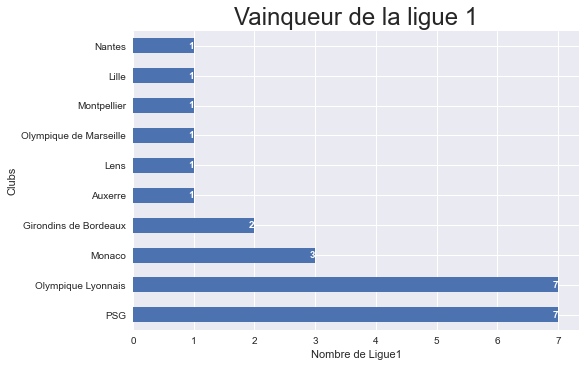

In [107]:
# Rprésentons par un grpahique
for i, value in enumerate(vainqueur):
    plt.text(value, i , str(value), horizontalalignment='right', verticalalignment='center', weight='bold', color='white')
#Utilisong un graphique horizontale
vainqueur.plot(kind='barh')
#Label et titre
plt.xlabel('Nombre de Ligue1')
plt.ylabel('Clubs')
plt.title('Vainqueur de la ligue 1', fontsize=24)

### Analyse du Dauphin

In [ ]:
Dauphin = df_scores[df_scores['Classement'] == 2].Club.value_counts()
Dauphin

Text(0.5, 1.0, 'Dauphin de la Ligue1')

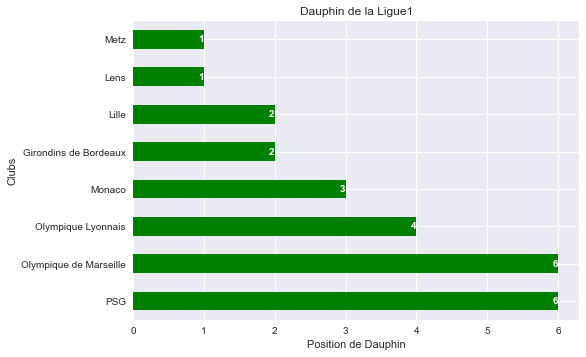

In [95]:
for i,value in enumerate(Dauphin):
    plt.text(value, i , str(value) ,horizontalalignment='right', verticalalignment='center', weight='bold', color='white')
Dauphin.plot(kind='barh', color='green')
plt.xlabel('Position de Dauphin')
plt.ylabel('Clubs')
plt.title("Dauphin de la Ligue1")

### Le nombres de Saisons en Ligue1

In [100]:
saisons_en_ligue1 = df_scores.groupby('Club').count().Classement.sort_values(ascending=False).head(10)
saisons_en_ligue1

Club
Rennes                    25
Girondins de Bordeaux     25
Olympique Lyonnais        25
PSG                       25
Olympique de Marseille    24
Monaco                    23
Lille                     22
Nice                      20
Nantes                    20
Toulouse                  20
Name: Classement, dtype: int64

Représentons çela par un grpahique

Text(0.5, 1.0, 'Nombre totals de Saison en Ligue 1 depuis 1995')

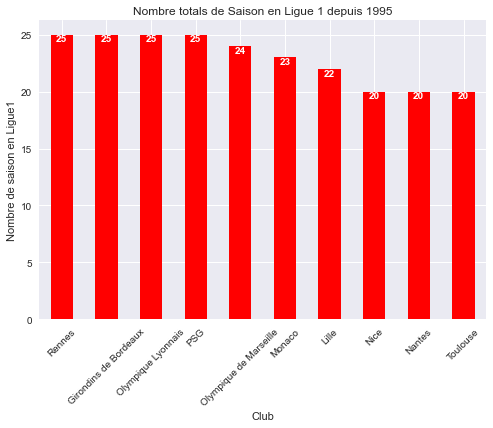

In [103]:
for i, value in enumerate(saisons_en_ligue1):
    plt.text(i , value, str(value), horizontalalignment='center', verticalalignment='top', weight='bold', color='white')
saisons_en_ligue1.plot(kind='bar', color='red')
plt.xticks(rotation=45)
plt.ylabel("Nombre de saison en Ligue1")
plt.title("Nombre totals de Saison en Ligue 1 depuis 1995")

In [106]:
number_clubs = df_scores.groupby('saison').count().Club
number_clubs

saison
40          1
1995-96    20
1996-97    20
1997-98    18
1998-99    18
1999-00    18
2000-01    18
2001-02    18
2002-03    20
2003-04    20
2004-05    20
2005-06    20
2006-07    20
2007-08    20
2008-09    20
2009-10    20
2010-11    20
2011-12    20
2012-13    19
2013-14    20
2014-15    20
2015-16    20
2016-17    20
2017-18    20
2018-19    20
2019-20    20
Name: Club, dtype: int64

### Evolution du nombre de ligue 1
Tout d'abord on peut créer un table pour indiquer les années où un club gagne la ligue 1

In [118]:
vainqueur_saison = pd.get_dummies(df_scores[df_scores["Classement"] ==1][['Club','saison']], columns=['Club'], prefix='',prefix_sep='')

#Mettons les saison en indice 
vainqueur_saison.set_index('saison', inplace=True)
vainqueur_saison

#Effectons une somme cumulé des saisons pour obtenir l'évolution
evolution_victoires = vainqueur_saison.loc[::-1].cumsum()
evolution_victoires.head(10)



,Auxerre,Girondins de Bordeaux,Lens,Lille,Monaco,Montpellier,Nantes,Olympique Lyonnais,Olympique de Marseille,PSG
saison,,,,,,,,,,
1995-96,1,0,0,0,0,0,0,0,0,0
1996-97,1,0,0,0,1,0,0,0,0,0
1997-98,1,0,1,0,1,0,0,0,0,0
1998-99,1,1,1,0,1,0,0,0,0,0
1999-00,1,1,1,0,2,0,0,0,0,0
2000-01,1,1,1,0,2,0,1,0,0,0
2001-02,1,1,1,0,2,0,1,1,0,0
2002-03,1,1,1,0,2,0,1,2,0,0
2003-04,1,1,1,0,2,0,1,3,0,0


Text(0, 0.5, 'Nombres de victoires en Ligue1')

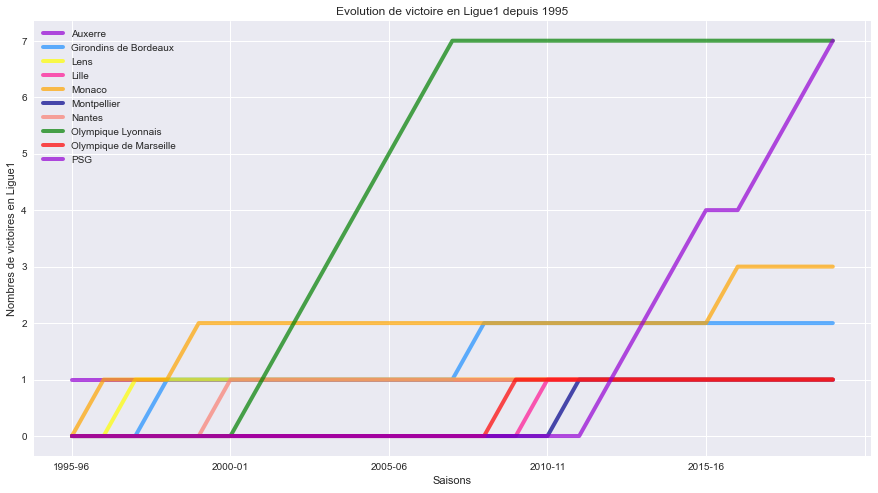

In [124]:
#Rprésentons ce tableau
colors=['darkviolet', 'dodgerblue', 'yellow', 'deeppink', 'orange', 'darkblue', 'salmon', 'green', 'red']

evolution_victoires.plot(color=colors,alpha=0.7, linewidth=4, figsize=(15,8))
plt.title("Evolution de victoire en Ligue1 depuis 1995")
plt.xlabel('Saisons')
plt.ylabel('Nombres de victoires en Ligue1')

# **Comparaison OL-PSG**

In [125]:
psg_vs_ol = evolution_victoires[['PSG', 'Olympique Lyonnais']].astype(float)
difference = psg_vs_ol['PSG'] - psg_vs_ol['Olympique Lyonnais']
difference

saison
1995-96    0.0
1996-97    0.0
1997-98    0.0
1998-99    0.0
1999-00    0.0
2000-01    0.0
2001-02   -1.0
2002-03   -2.0
2003-04   -3.0
2004-05   -4.0
2005-06   -5.0
2006-07   -6.0
2007-08   -7.0
2008-09   -7.0
2009-10   -7.0
2010-11   -7.0
2011-12   -7.0
2012-13   -6.0
2013-14   -5.0
2014-15   -4.0
2015-16   -3.0
2016-17   -3.0
2017-18   -2.0
2018-19   -1.0
2019-20    0.0
dtype: float64

Text(0.5, 1.0, "Différence de Ligue1 entre le PSG et l'OL")

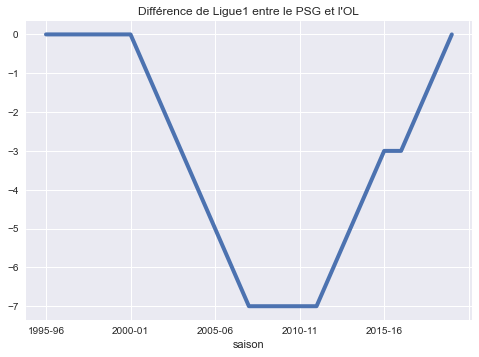

In [127]:
difference.plot(linewidth=4)
plt.title("Différence de Ligue1 entre le PSG et l'OL")

# Carton Jaunes et Rouge

### Nombre de carton rouges

Text(0, 0.5, 'Carton rouge')

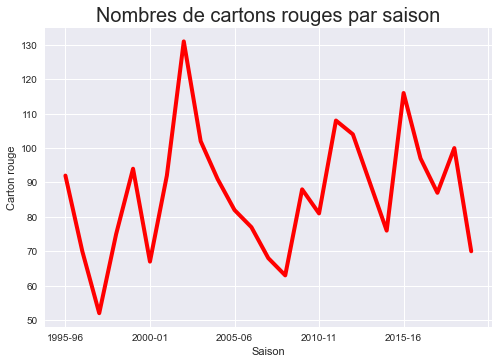

In [145]:
carton_rouges = df_scores.groupby('saison').sum().Carton_Rouge
carton_rouges.drop(40, inplace=True)
carton_rouges
carton_rouges.plot(linewidth=4, color='red')
plt.title("Nombres de cartons rouges par saison", fontsize=20)
plt.xlabel('Saison')
plt.ylabel("Carton rouge")

### Même chose pour les cartons jaunes

Text(0, 0.5, 'Carton jaunes')

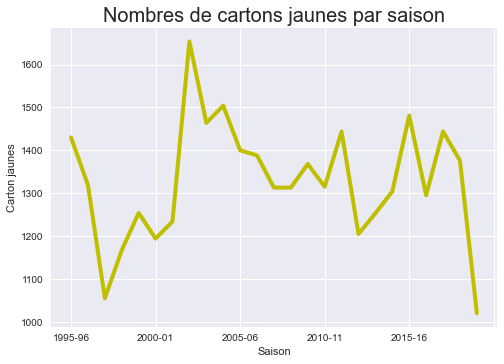

In [147]:
carton_jaunes = df_scores.groupby('saison').sum().Carton_Jaune
carton_jaunes.drop(40, inplace=True)
carton_jaunes
carton_jaunes.plot(linewidth=4, color='y')
plt.title("Nombres de cartons jaunes par saison", fontsize=20)
plt.xlabel('Saison')
plt.ylabel("Carton jaunes")

### Carton Jaunes par équipe

Text(0, 0.5, 'Moyenne des  cartons jaune')

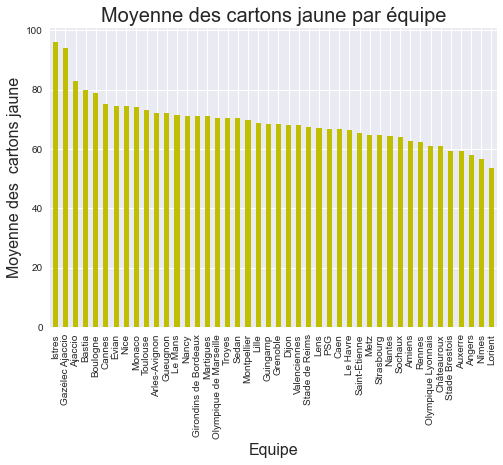

In [162]:
carton_jaunes_equipe = df_scores.groupby('Club').mean().Carton_Jaune.sort_values(ascending=False)
carton_jaunes_equipe.drop(40, inplace=True)

carton_jaunes_equipe.plot(kind='bar',color='y')
plt.title('Moyenne des cartons jaune par équipe', fontsize=20)
plt.xlabel('Equipe', fontsize=16)
plt.ylabel('Moyenne des  cartons jaune', fontsize=16)


### Carton Rouge par équipe

Text(0, 0.5, 'Moyenne des  cartons rouge')

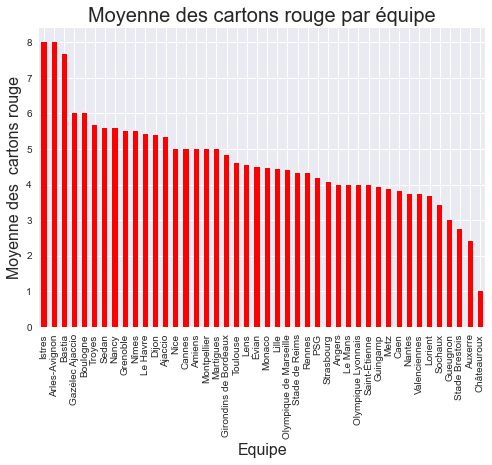

In [163]:
carton_rouges_equipe = df_scores.groupby('Club').mean().Carton_Rouge.sort_values(ascending=False)
carton_rouges_equipe.drop(40, inplace=True)

carton_rouges_equipe.plot(kind='bar',color='r')
plt.title('Moyenne des cartons rouge par équipe', fontsize=20)
plt.xlabel('Equipe', fontsize=16)
plt.ylabel('Moyenne des  cartons rouge', fontsize=16)